# Readme
1. Edit > Notebook settings > GPU

# ติดตั้ง Library  ที่ใช้งาน
- เสร็จแล้วให้กดที่ปุ่ม Restart Runtime

In [3]:
#!pip uninstall imageai -y
!pip install imageai --upgrade
!pip install tensorflow==2.4.0
!pip install tensorflow-gpu==2.4.0
!pip uninstall matplotlib -y
!pip install keras==2.4.3 numpy==1.19.3 pillow==7.0.0 scipy==1.4.1 h5py==2.10.0 matplotlib==3.3.2 opencv-python keras-resnet==0.2.0


     |████████████████████████████████| 160 kB 5.3 MB/s 
     |████████████████████████████████| 2.1 MB 50.2 MB/s 
     |████████████████████████████████| 2.9 MB 37.9 MB/s 
     |████████████████████████████████| 14.9 MB 40.4 MB/s 
     |████████████████████████████████| 11.6 MB 24.1 MB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=c206d77d7c7e8d619f0f06d392979083d72478806651bbfac251839d323fb712
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
 

     |████████████████████████████████| 394.7 MB 17 kB/s 
     |████████████████████████████████| 462 kB 50.2 MB/s 
     |████████████████████████████████| 3.8 MB 37.1 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68721 sha256=318635acb04d3db907e8d416f3cc37748a491cb4812a412ea66f8ac8260c25c6
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.43.0
    Uninstalling grpcio-1.43.0:
      Successfully uninstalled grpcio-1.43.0
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.13.3
    Uninstalling wrapt-1.13.3:
      Successfully uninstalled wrapt-1.13.3
  Attempting uninstall:

     |████████████████████████████████| 394.7 MB 18 kB/s 


Found existing installation: matplotlib 3.3.2
Uninstalling matplotlib-3.3.2:
  Successfully uninstalled matplotlib-3.3.2
  Using cached matplotlib-3.3.2-cp37-cp37m-manylinux1_x86_64.whl (11.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


#ตรวจสอบ Device

In [5]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 744182020623530002, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11140623232
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7483809018345485129
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

# เชื่อมต่อ google Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## กำหนดที่อยู่ของ drive

In [9]:
path = '/content/drive/MyDrive/@OlarikWorkingSpace/SuperAI-2022/'

#Pre-trained model
path_pretrainmodel = path + 'Pre-trained-Model/detection_model-ex-005--loss-0020.487.h5'

# Training imageai

In [ ]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory = path)

# using pre-trained model

trainer.setTrainConfig(object_names_array = ['text-label'], 
                       batch_size = 4, 
                       num_experiments = 5, 
#                       train_from_pretrained_model = path+'/Pre-trained-Model/detection_model-ex-005--loss-0020.487.h5')
                       train_from_pretrained_model = path+'/models/detection_model-ex-005--loss-0016.245.h5')
'''
# first time training
trainer.setTrainConfig(object_names_array = ['text-label'], 
                       batch_size = 4, 
                       num_experiments = 5, 
                       train_from_pretrained_model = ' ')
'''

trainer.trainModel()

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.80
Anchor Boxes generated.
Detection configuration saved in  /content/drive/MyDrive/@OlarikWorkingSpace/SuperAI-2022/json/detection_config.json
Evaluating over 62 samples taken as 20.00% of the training set given at /content/drive/MyDrive/@OlarikWorkingSpace/SuperAI-2022/train
Training over 248 samples  given at /content/drive/MyDrive/@OlarikWorkingSpace/SuperAI-2022/train
Training on: 	['text-label']
Training with Batch Size:  4
Number of Training Samples:  248
Number of Validation Samples:  62
Number of Experiments:  5
Training with transfer learning from pretrained Model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/5
496/496 [==============================] - 572s 1s/step - loss: 32.0595 - yolo_layer_3_loss: 3.7468 - yolo_layer_4_loss: 9.6226 - yolo_layer_5_loss: 7.2279 - val_loss: 23.4141 - val_yolo_layer_3_loss: 1.4991 - val_yolo_layer_4_loss: 7.5682 - val_yolo_layer_5_loss: 5.5585
Epoch 2/5
496/496 [==============================] - 548s 1s/step - loss: 20.9179 - yolo_layer_3_loss: 2.6404 - yolo_layer_4_loss: 5.7326 - yolo_layer_5_loss: 4.7439 - val_loss: 17.8598 - val_yolo_layer_3_loss: 1.6662 - val_yolo_layer_4_loss: 4.0496 - val_yolo_layer_5_loss: 6.0662
Epoch 3/5
496/496 [==============================] - 560s 1s/step - loss: 17.8336 - yolo_layer_3_loss: 2.6044 - yolo_layer_4_loss: 4.3902 - yolo_layer_5_loss: 4.9822 - val_loss: 21.8943 - val_yolo_layer_3_loss: 6.5084 - val_yolo_layer_4_loss: 4.6454 - val_yolo_layer_5_loss: 5.3542
Epoch 4/5
496/496 [==============================] - 562s 1s/step - loss: 17.2183 - yolo_layer_3_loss: 3.0571 - yolo_layer_4_loss: 3.9439 - yolo_layer_5_l

# Evaluation

In [1]:
import glob
import os
from imageai.Detection.Custom import DetectionModelTrainer
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory= path)
metrics = trainer.evaluateModel(model_path = path+'models/detection_model-ex-005--loss-0016.245.h5', 
                                json_path = path+'json/detection_config.json', 
                                iou_threshold = 0.5, 
                                object_threshold = 0.3, 
                                nms_threshold = 0.5)

ModuleNotFoundError: ignored

# Detection

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


text-label  :  65.80197811126709  :  [443, 632, 789, 668]


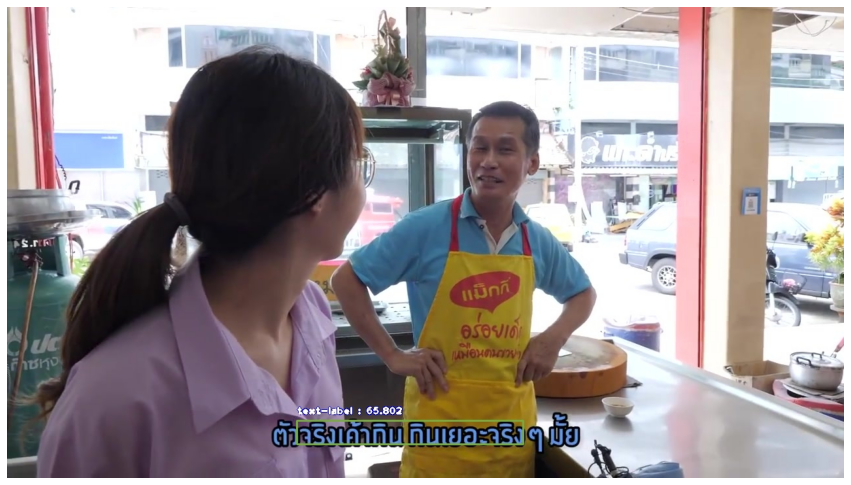

text-label  :  85.29096245765686  :  [406, 611, 888, 667]


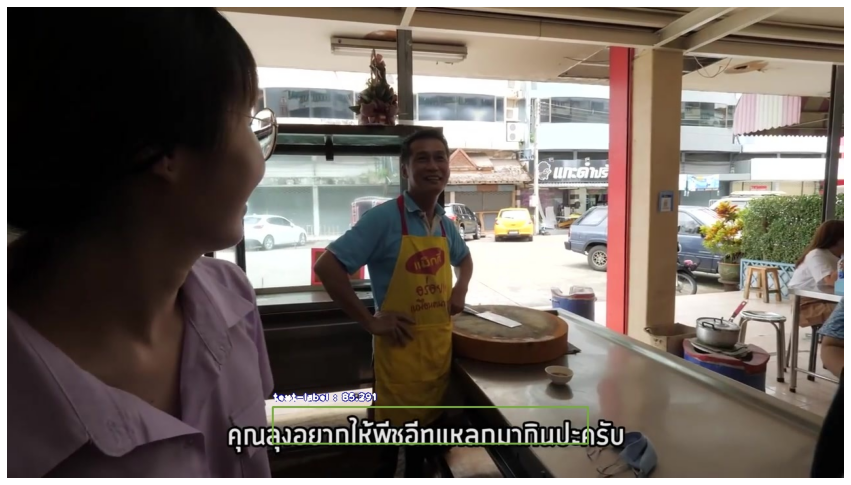

In [24]:
from imageai.Detection.Custom import CustomObjectDetection

import cv2
import matplotlib.pyplot as plt

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()

# choose the best model
detector.setModelPath(path+'models/detection_model-ex-005--loss-0016.245.h5') 
detector.setJsonPath(path+'json/detection_config.json')
detector.loadModel()

in_image = [path+'annotation/images/วันของข้าวมันไก่แห่งชาติ 331.jpg', path+'annotation/images/วันของข้าวมันไก่แห่งชาติ 337.jpg']
out_image = [path+'result/1_1.jpg', path+'result/1_2.jpg']

for i in range(0, len(in_image)):
  detections = detector.detectObjectsFromImage(input_image=in_image[i], output_image_path=out_image[i])
  for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])
    
  # show detected image
  img = cv2.imread(out_image[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(15,15))
  plt.imshow(img)
  plt.axis('off')
  plt.show()